# 第6章：有监督学习：分类

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%precision 3

'%.3f'

In [2]:
#生成数据
np.random.seed(0)
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerbluw', 'gray']
X = np.zeros(X_n)
T = np.zeros(X_n, dtype=np.uint8)
Dist_s = [.4, .8]
Dist_w = [.8, 1.6]
Pi = 0.5
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 *(wk >= Pi)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]
print('X=' + str(np.round(X,2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


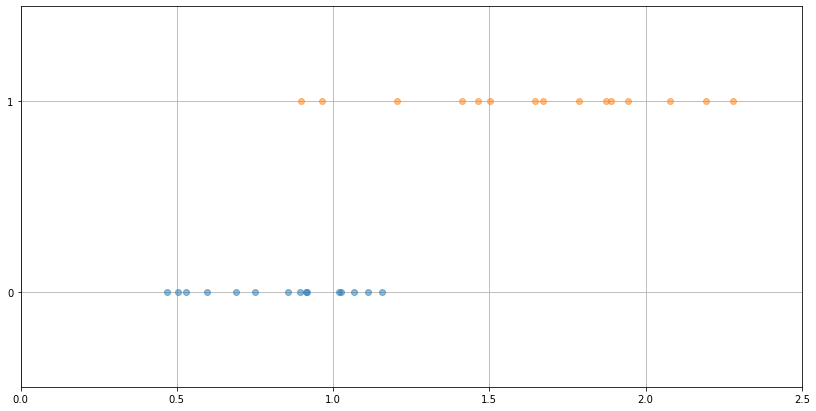

In [9]:
#显示数据
def show_data1(x,t):
    K = np.max(t) + 1
    for k in range(K):
        plt.plot(x[t==k], t[t==k], alpha=.5, linestyle='none', marker='o')
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0,1])
#主处理
fig = plt.figure(figsize=(14,7))
show_data1(X,T)
plt.show()

### 6.1.4 logistics model

In [10]:
def logistic(x,w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

1.25

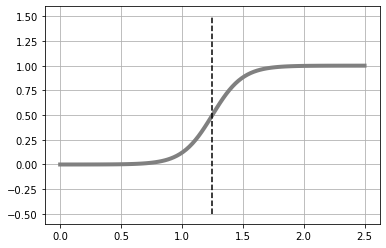

In [11]:
#决策边界
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb,w)
    plt.plot(xb,y,color='gray',linewidth=4)
    i = np.min(np.where(y>.5))
    B = (xb[i-1] + xb[i]) / 2
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle = '--')
    plt.grid(True)
    return B
#test
W = [8, -10]
show_logistic(W)

### 6.1.5 平均交叉熵误差

In [12]:
def cee_logistic(w,x,t):
    y = logistic(x,w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1-t[n]) * np.log(1-y[n]))
    cee = cee / X_n
    return cee
#test
W = [1,1]
cee_logistic(W,X,T)

1.0288191541851066

In [13]:
from mpl_toolkits.mplot3d import Axes3D

AttributeError: 'QuadContourSet' object has no attribute 'clable'

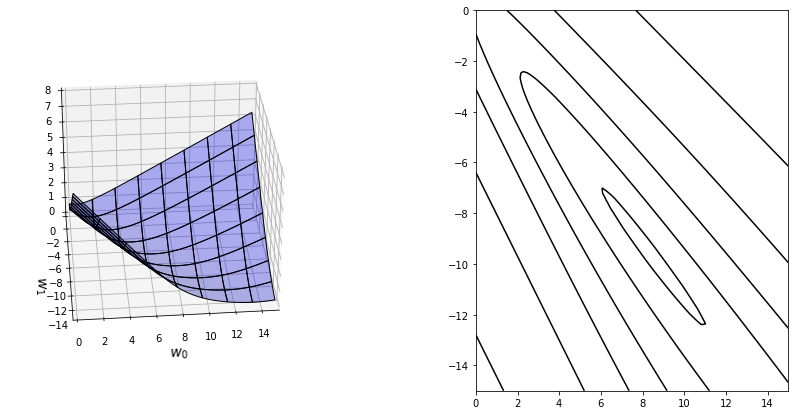

In [19]:
#computing
wn = 80 #等高线分辨率
w_range = np.array([[0,15],[-15,0]])
w0 = np.linspace(w_range[0,0], w_range[0,1], wn)
w1 = np.linspace(w_range[1,0], w_range[1,1], wn)
ww0, ww1 = np.meshgrid(w0,w1)
C = np.zeros((len(w1),len(w0)))
w = np.zeros(2)
for i0 in range(wn):
    for i1 in range(wn):
        w[0] = w0[i0]
        w[1] = w1[i1]
        C[i1, i0] = cee_logistic(w,X,T)
#显示
plt.figure(figsize=(14,7))
plt.subplots_adjust(wspace=.5)
ax = plt.subplot(1,2,1,projection='3d')
ax.plot_surface(ww0, ww1, C, color='blue', edgecolor='black',rstride=10, cstride=10,alpha=.3)
ax.set_xlabel('$w_0$',fontsize=14)
ax.set_ylabel('$w_1$',fontsize=14)
ax.set_xlim(0,15)
ax.set_ylim(-15,0)
ax.set_zlim(0,8)
ax.view_init(30,-95)

plt.subplot(1,2,2)
cont = plt.contour(ww0, ww1, C, 20, colors='black',levels=[.26,.4,.8,1.6,3.2,6.4])
cont.clable(fmt='%.1f',fontsize=8)
plt.xlabel('$w_0$',fontsize=14)
plt.ylabel('$$w_1',fontsize=14)
plt.grid(True)
plt.show()